EXAMPLES ON MODEL SELECTION AND EVAL

In [21]:
import numpy as np

import tensorflow as tf

#used to implement linear regression model easily
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [7]:
data = np.loadtxt("C:\\Users\\Lenovo\\OneDrive\\Desktop\\coursera_ml\\data4.csv", delimiter=',')  #same as using
#pd.read_csv()
data

array([[1651.        ,  432.64521724],
       [1691.81632653,  454.93552962],
       [1732.63265306,  471.52524758],
       [1773.44897959,  482.50638875],
       [1814.26530612,  468.35788634],
       [1855.08163265,  482.15253068],
       [1895.89795918,  540.02175551],
       [1936.71428571,  534.58426716],
       [1977.53061224,  558.34620761],
       [2018.34693878,  566.42344476],
       [2059.16326531,  581.39765115],
       [2099.97959184,  596.45873727],
       [2140.79591837,  596.71483169],
       [2181.6122449 ,  619.45139015],
       [2222.42857143,  616.57626499],
       [2263.24489796,  653.16245988],
       [2304.06122449,  666.5199211 ],
       [2344.87755102,  670.58975936],
       [2385.69387755,  669.0228872 ],
       [2426.51020408,  678.90932305],
       [2467.32653061,  707.43696439],
       [2508.14285714,  710.76028811],
       [2548.95918367,  745.19134109],
       [2589.7755102 ,  729.84576182],
       [2630.59183673,  743.8029216 ],
       [2671.40816327,  7

In [50]:
#this dataset has only 1 feature so
x = data[:, 0]  #1 order tensor
y = data[:, 1]  #1 order tensor
print("iniital shape", x.shape)

#expanding x, y to 2nd order tensor, needed for train_test_split function to work
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
print(x)
print(x.shape)

iniital shape (50,)
[[1651.        ]
 [1691.81632653]
 [1732.63265306]
 [1773.44897959]
 [1814.26530612]
 [1855.08163265]
 [1895.89795918]
 [1936.71428571]
 [1977.53061224]
 [2018.34693878]
 [2059.16326531]
 [2099.97959184]
 [2140.79591837]
 [2181.6122449 ]
 [2222.42857143]
 [2263.24489796]
 [2304.06122449]
 [2344.87755102]
 [2385.69387755]
 [2426.51020408]
 [2467.32653061]
 [2508.14285714]
 [2548.95918367]
 [2589.7755102 ]
 [2630.59183673]
 [2671.40816327]
 [2712.2244898 ]
 [2753.04081633]
 [2793.85714286]
 [2834.67346939]
 [2875.48979592]
 [2916.30612245]
 [2957.12244898]
 [2997.93877551]
 [3038.75510204]
 [3079.57142857]
 [3120.3877551 ]
 [3161.20408163]
 [3202.02040816]
 [3242.83673469]
 [3283.65306122]
 [3324.46938776]
 [3365.28571429]
 [3406.10204082]
 [3446.91836735]
 [3487.73469388]
 [3528.55102041]
 [3569.36734694]
 [3610.18367347]
 [3651.        ]]
(50, 1)


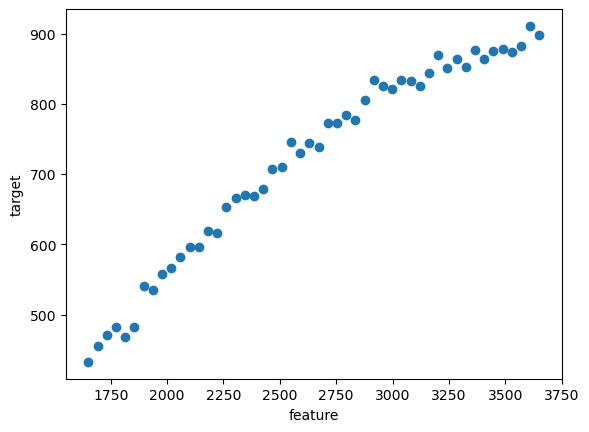

In [26]:
plt.scatter(x[:, 0], y[:, 0])
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [47]:
#splitting the data to train, cross validation, test samples
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

In [48]:
print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)

(30, 1)
(10, 1)
(10, 1)


In [53]:
#applying z-score normalisation to ensure that model converges faster(altough its used when more than 1 features
#are present)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

print(scaler.mean_)  #mean
print(scaler.mean_[0])

print(scaler.scale_[0])  #SD
# both work the same way

[2504.06122449]
2504.061224489796
574.8536806268388


In [58]:
#training the model

######
linear_model = LinearRegression()

linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [60]:
linear_model.coef_

array([[136.35728659]])

In [62]:
#finding the training error
yhat = linear_model.predict(x_train_scaled)
print("Training error: ", mean_squared_error(yhat, y_train)/2)

Training error:  406.19374192533155


In [65]:
#now even while finding MSE for cv, test set, we use the
#same values of mean and SD of that of the training set,
#and this is to ensure consistency

x_cv_scaled = scaler.transform(x_cv)
yhat1 = linear_model.predict(x_cv_scaled)
print("MSE for CV set: ", mean_squared_error(yhat1, y_cv)/2)

MSE for CV set:  551.7789026952216


now we will experiment with other models to see whose MSE on CV set is smallest adding polynommial features to x_train now

In [73]:
poly = PolynomialFeatures(degree=2, include_bias=False)  #instantiating the class PolynomialFeatures

x_train_mapped = poly.fit_transform(x_train)   #now it has a second feature x^2
print(x_train_mapped)

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]
 [1.81426531e+03 3.29155860e+06]
 [2.99793878e+03 8.98763690e+06]
 [2.22242857e+03 4.93918876e+06]
 [2.87548980e+03 8.26844157e+06]
 [2.05916327e+03 4.24015335e+06]
 [2.79385714e+03 7.80563773e+06]
 [3.44691837e+03 1.18812462e+07]
 [3.03875510e+03 9.23403257e+06]
 [2.38569388e+03 5.69153528e+06]
 [2.46732653e+03 6.08770021e+06]
 [2.67140816e+03 7.13642157e+06]
 [1.89589796e+03 3.59442907e+06]
 [1.93671429e+03 3.75086222e+06]
 [3.56936735e+03 1.27403833e+07]
 [1.69181633e+03 2.86224248e+06]
 [2.30406122e+03 5.30869813e+06]
 [1.65100000e+03 2.72580100e+06]
 [2.26324490e+03 5.12227747e+06]
 [1.85508163e+03 3.44132786e+06]
 [2.09997959e+03 4.40991429e+06]
 [2.01834694e+03 4.07372437e+06]
 [1.97753061e+03 3.91062732e+06]
 [2.14079592e+03 4.58300716e+06]
 [3.40610204e+03 1.16015311e+07]
 [3.16120408e+03 9.99321125e+06]]


In [67]:
#now scaling the features 
scaler_poly = StandardScaler()  #creating a new instance of this class for this new model
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
print(x_train_mapped_scaled)

[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]
 [-1.19995042 -1.09459566]
 [ 0.8591361   0.78950426]
 [-0.48992059 -0.54960669]
 [ 0.64612715  0.55161499]
 [-0.77393252 -0.78082762]
 [ 0.50412118  0.39853271]
 [ 1.64016892  1.74662753]
 [ 0.93013909  0.8710049 ]
 [-0.20590865 -0.30075196]
 [-0.06390269 -0.16971192]
 [ 0.29111223  0.17717513]
 [-1.05794446 -0.99441476]
 [-0.98694147 -0.94267114]
 [ 1.85317788  2.0308055 ]
 [-1.41295938 -1.23660116]
 [-0.34791462 -0.42738355]
 [-1.48396236 -1.2817321 ]
 [-0.4189176  -0.48904617]
 [-1.12894744 -1.04505626]
 [-0.70292954 -0.72467556]
 [-0.84493551 -0.83587757]
 [-0.91593849 -0.88982541]
 [-0.63192656 -0.66742138]
 [ 1.56916594  1.65410576]
 [ 1.14314804  1.12211951]]


In [69]:
model1 = LinearRegression()    #does not use the iterative approach but uses mathematical analysis to get to the 
#optimal ish answer in one iteration, if we want to implement the iterative approach that was done earlier manually
#then SGDRegressor class of sklearn must be used 
model1.fit(x_train_mapped_scaled, y_train)

LinearRegression()

In [71]:
yhat_poly = model1.predict(x_train_mapped_scaled)
print("Error on training set for polynomial model of 2 degree: ", mean_squared_error(yhat_poly, y_train)/2)

Error on training set for polynomial model of 2 degree:  49.111609334025154


In [72]:
#we divide the result from mean_squared_error() by 2 since it intrinsically does not do that and by convention
#we want it to be done

In [75]:
x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)
yhat_poly1 = model1.predict(x_cv_mapped_scaled)
print("Error on training set for polynomial model of 2 degree: ", mean_squared_error(yhat_poly1, y_cv)/2)

Error on training set for polynomial model of 2 degree:  87.69841211111911


In [ ]:
#MSE is better on CV set in this case than the linear case

In [ ]:
#if we want regularisation in our LinearRegression model from sklearn then we instantiate the Ridge class which is the same
#but takes in alpha which is the regularisation param